In [1]:
import os 
os.chdir('../../')
print("Current working directory is now: ", os.getcwd())

import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

Current working directory is now:  C:\Users\Feroze\Google Drive\DUKE 2016-2020\psa-analysis


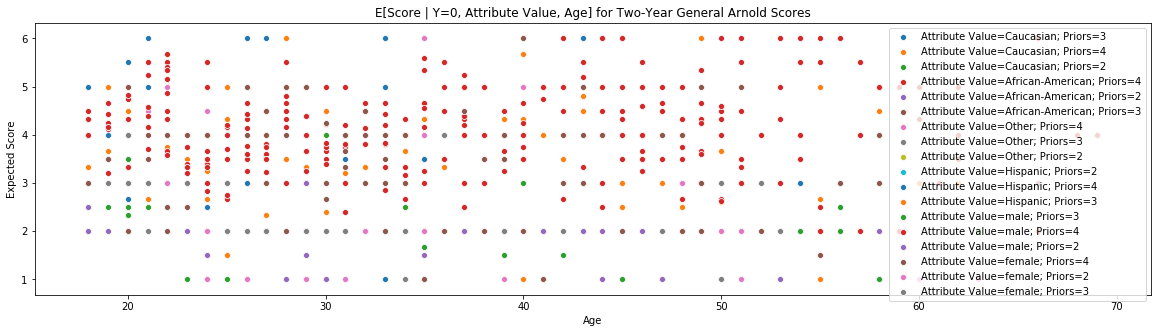

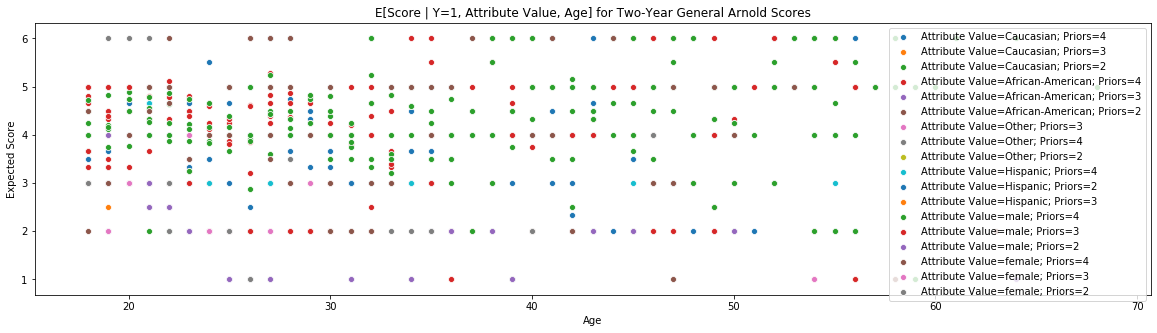

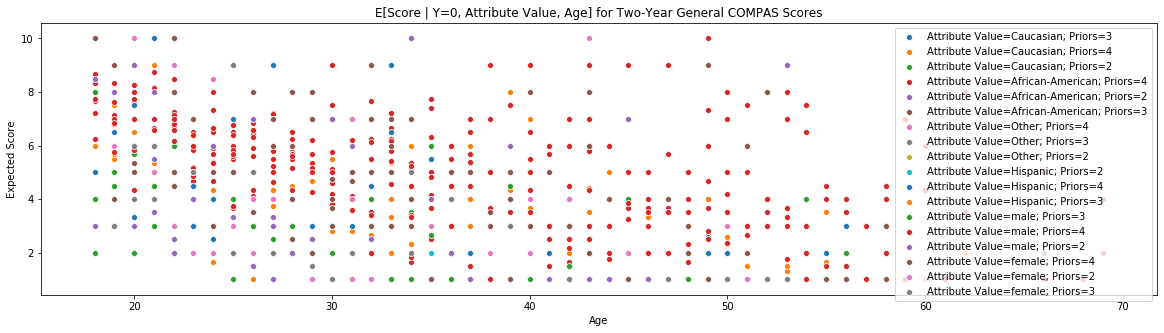

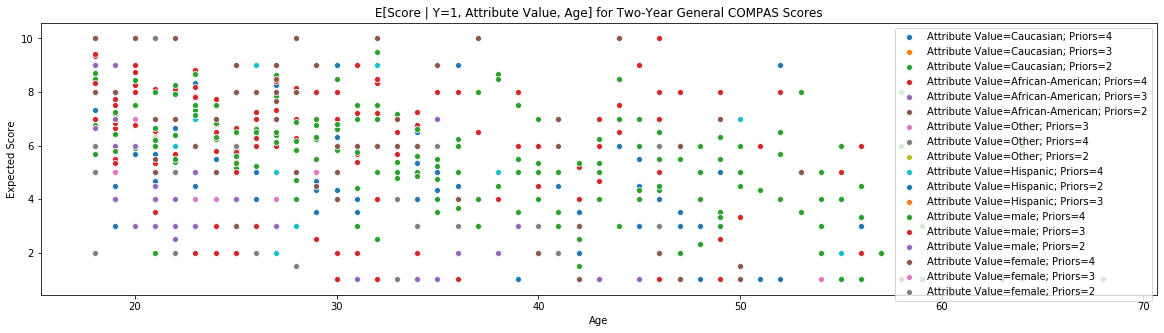

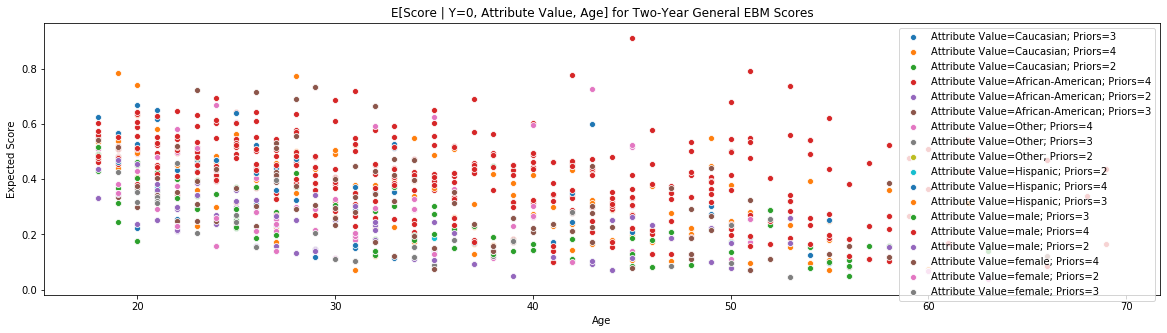

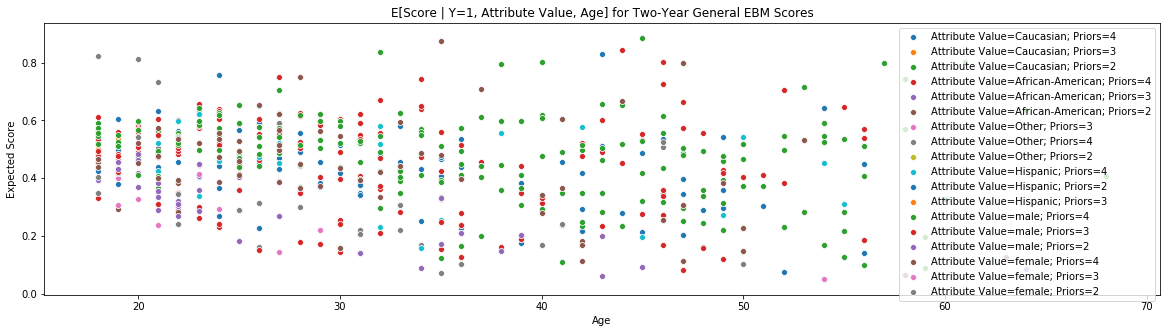

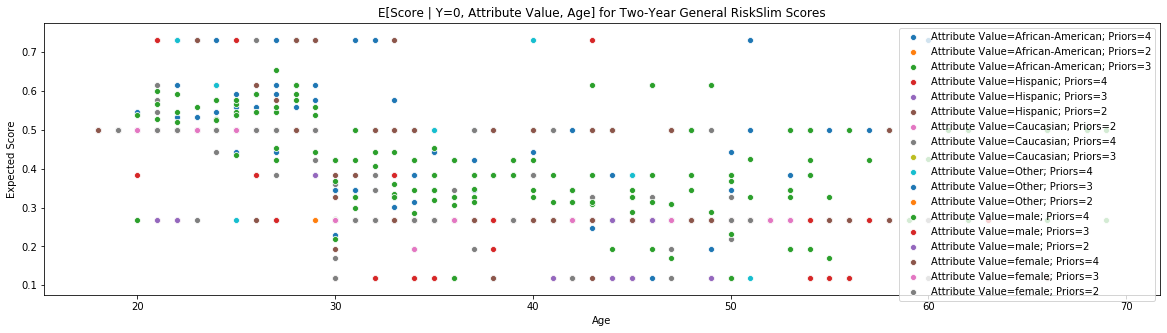

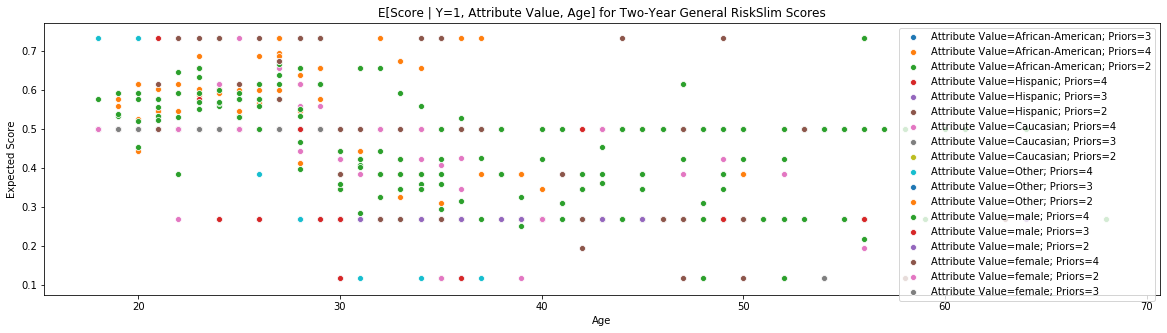

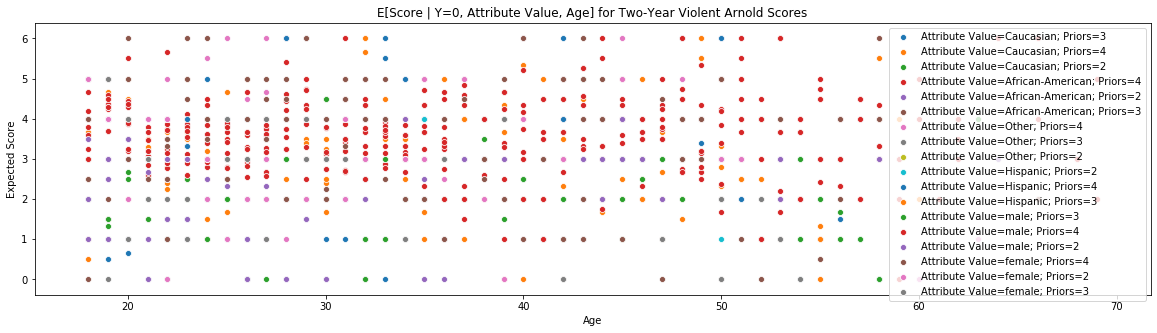

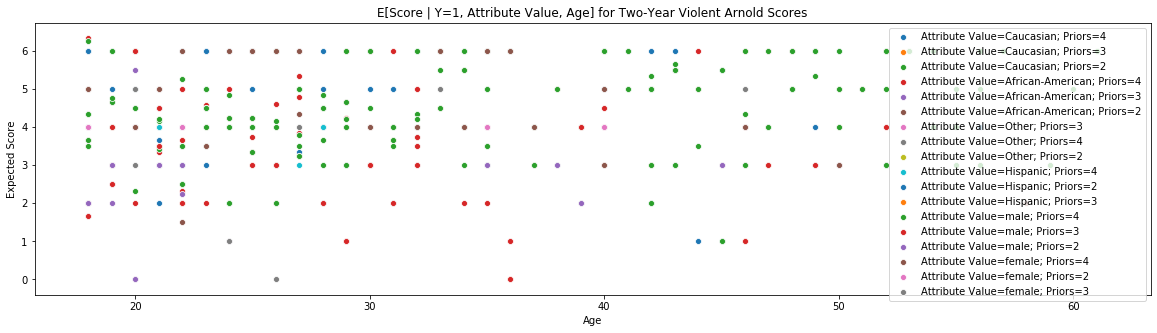

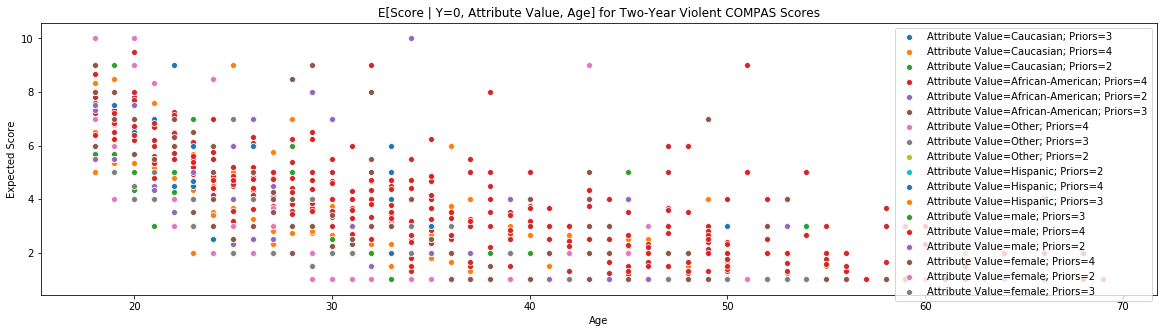

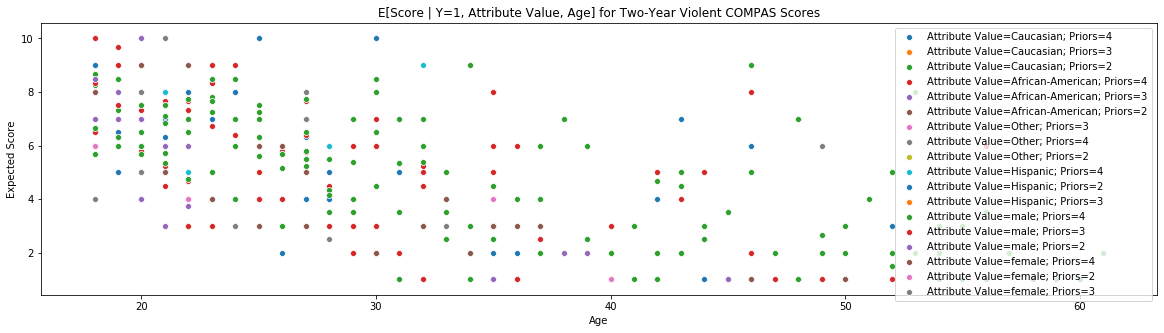

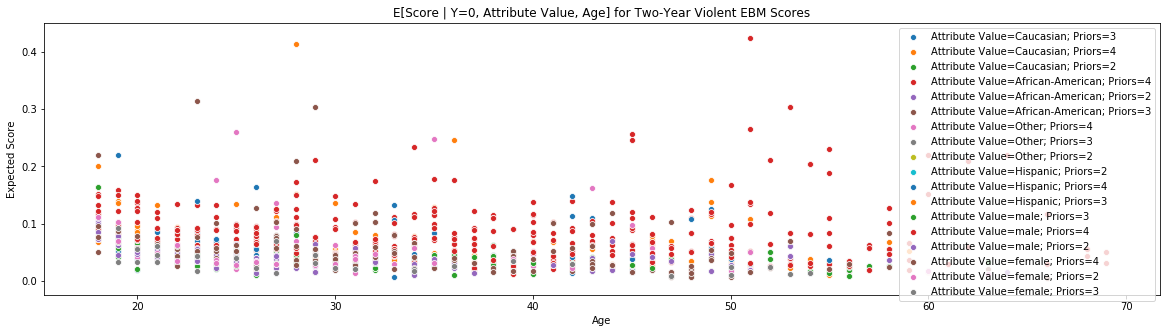

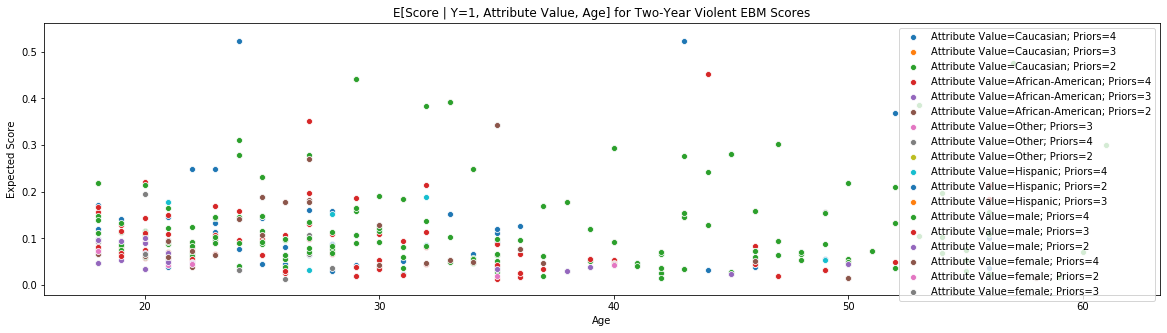

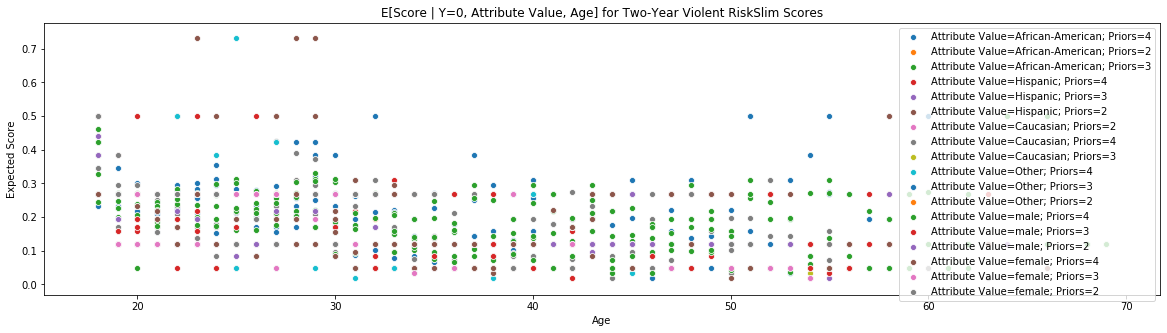

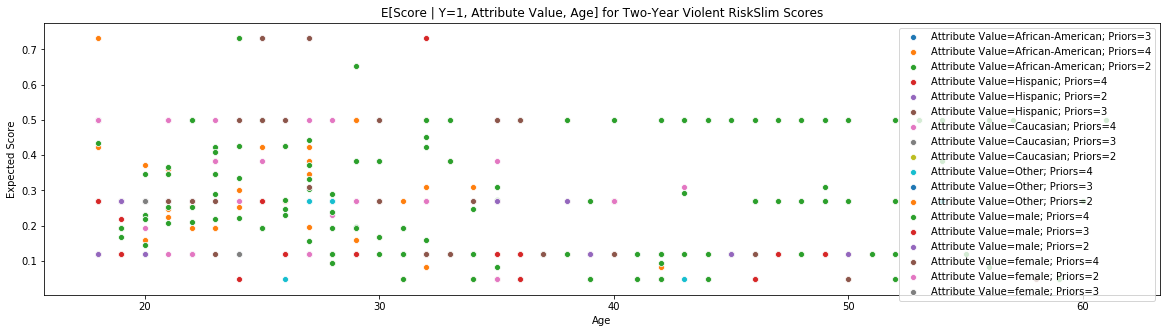

In [31]:
translate_dic = {
    "general/": "General", 
    "violent/": "Violent",
    "arnold_condition_pn": "Arnold Scores",
    "compas_condition_pn": "COMPAS Scores",
    "ebm_condition_pn": "EBM Scores",
    "riskslim_condition_pn": "RiskSlim Scores"
}
for problem in ["general/", "violent/"]:
    for model in ["arnold_condition_pn", "compas_condition_pn", "ebm_condition_pn", "riskslim_condition_pn"]:
        temp = pd.read_csv('broward/FL Condition PN/two-year/'+problem+model+'.csv')
        negative_labels = temp[temp["Label"]==0]
        fig1, ax1 = plt.subplots(1,1, figsize=(20,5))
        legendlabels = []
        for attribute in negative_labels["Attribute Value"].unique():
            for prior in negative_labels["Prior"][negative_labels["Attribute Value"]==attribute].unique():
                x = negative_labels["Age"][(negative_labels["Attribute Value"]==attribute) & (negative_labels["Prior"]==prior)]
                y = negative_labels["Expected Score"][(negative_labels["Attribute Value"]==attribute) & (negative_labels["Prior"]==prior)]
                sns.scatterplot(x, y, ax=ax1)
                priorlabel = prior if prior is not "4" else "4+" 
                legendlabels.append("Attribute Value="+attribute+"; Priors="+str(priorlabel))
        ax1.legend(labels=legendlabels)
        ax1.set_title('E[Score | Y=0, Attribute Value, Age] for Two-Year '+ translate_dic[problem]+ ' ' + translate_dic[model])

        positive_labels = temp[temp["Label"]==1]
        fig2, ax2 = plt.subplots(1,1, figsize=(20,5))
        secondlegendlabels = []
        for attribute in positive_labels["Attribute Value"].unique():
            for prior in positive_labels["Prior"][positive_labels["Attribute Value"]==attribute].unique():
                x = positive_labels["Age"][(positive_labels["Attribute Value"]==attribute) & (positive_labels["Prior"]==prior)]
                y = positive_labels["Expected Score"][(positive_labels["Attribute Value"]==attribute) & (positive_labels["Prior"]==prior)]
                sns.scatterplot(x, y, ax=ax2)
                priorlabel = prior if prior is not "4" else "4+" 
                secondlegendlabels.append("Attribute Value="+attribute+"; Priors="+str(priorlabel))
        ax2.legend(labels=secondlegendlabels)
        ax2.set_title('E[Score | Y=1, Attribute Value, Age] for Two-Year '+ translate_dic[problem]+ ' ' + translate_dic[model])
